In [48]:
import gpflow
import base
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from importlib import reload 
from gpsig import kernels
%matplotlib inline
from utils.leadlag import leadlag
import esig
tf.keras.backend.set_floatx('float64')
reload(kernels)
import evaluation
reload(evaluation)

import process_discriminator
reload(process_discriminator)

<module 'process_discriminator' from '../src\\process_discriminator.py'>

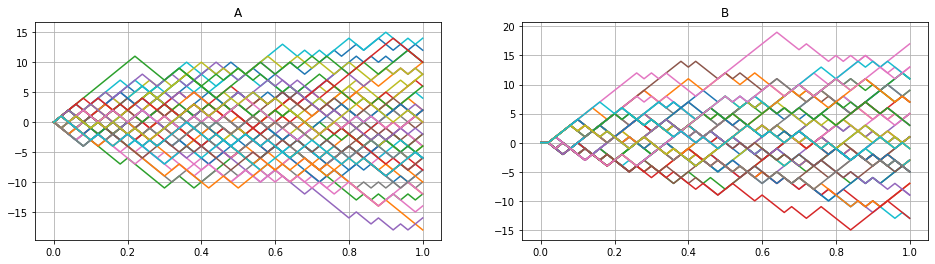

In [49]:
t = np.linspace(0,1,51)
def p1(t):
    x = np.zeros_like(t)
    for i in range(len(t)-1):
        x[i+1] = x[i] + np.random.binomial(1,0.5)*2-1
    return x
def p2(t):
    x = np.zeros_like(t)
    for i in range(len(t)-1):
        if i%3 == 0:
            x[i+1] = x[i] + (x[i]-x[i-1])*(x[i-1]-x[i-2])
        else:
            x[i+1] = x[i] + np.random.binomial(1,0.5)*2-1
    return x
plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
plt.plot(t,np.array([p1(t) for i in range(50)]).T)
plt.grid()
plt.title('A')
plt.subplot(1, 2, 2)
plt.plot(t,np.array([p2(t) for i in range(50)]).T)
plt.title('B')
plt.grid()
plt.show()


In [50]:
H1 = []
H0 = []
H1_exp = []
H0_exp = []
num_levels = 3
num_lags = 3
kern = kernels.SignatureKernel(base_kernel = gpflow.kernels.Exponential(), \
                               num_levels = num_levels, order = num_levels, num_lags = num_lags)
kern0 = kernels.SignatureKernel(base_kernel = gpflow.kernels.Linear(), \
                               num_levels = num_levels, order = num_levels, num_lags = num_lags)

for i in range(20):
    print(i)
    X = tf.constant([p1(t) for i in range(50)])[:,:,None]
    Y = tf.constant([p2(t) for i in range(50)])[:,:,None]
    Z = tf.constant([p1(t) for i in range(50)])[:,:,None]
    
    
    H1.append(evaluation.Sig_TU2(X,Y, kern0))
    H0.append(evaluation.Sig_TU2(X,Z, kern0))
    
    H1_exp.append(evaluation.Sig_TU2(X,Y, kern))
    H0_exp.append(evaluation.Sig_TU2(X,Z, kern))

0


KeyboardInterrupt: 

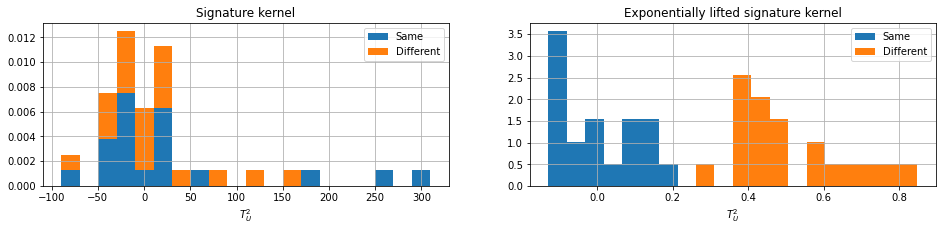

In [47]:
f,p = plt.subplots(1,2,figsize=(16,3))

TU = np.array([H0,H1])
label = ['Same', 'Different'] 
p[0].hist(TU.T, bins = 20, density=True, histtype='bar', stacked=True, label = label)
p[0].legend()
p[0].grid()
p[0].set_xlabel('$T_{U}^{2}$')
p[0].title.set_text('Signature kernel')

TU_exp = np.array([H0_exp,H1_exp])
label = ['Same', 'Different'] 
p[1].hist(TU_exp.T, bins = 20, density=True, histtype='bar', stacked=True, label = label)
p[1].legend()
p[1].grid()
p[1].set_xlabel('$T_{U}^{2}$')
p[1].title.set_text('Exponentially lifted signature kernel')

plt.show()

# History

In [78]:
num_levels = 5
num_examples = 2
len_examples = 10
num_features = 3
# X = np.arange(30)
# X = np.reshape(X,(num_examples, len_examples, num_features))
# X = X.astype('float64') 
X = np.random.randn(num_examples, len_examples, num_features)
X2 = np.random.randn(num_examples, len_examples, num_features)

esig.is_library_loaded()
sigs = np.asarray([esig.tosig.stream2sig(x, num_levels) for x in X])
sigs2 = np.asarray([esig.tosig.stream2sig(x2, num_levels) for x2 in X2])
K_esig = sigs @ sigs2.T
K_esig